In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.utils import check_array
from keras.models import load_model
from keras.layers import Bidirectional
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers import Dense,LSTM,Dropout,Activation
import os
from sklearn.metrics import mean_absolute_percentage_error

In [32]:
df=pd.read_csv('next_Alpha_Iran.csv',usecols=['cases'])

df.head()

cases
0  11420
1  11680
2  13890
3  17430
4  20954

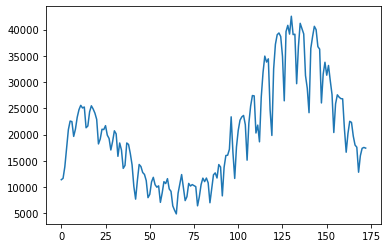

In [33]:
plt.plot(df)

In [34]:
len(df)

173

In [35]:
df1=pd.read_csv('next_Alpha_Iran.csv',usecols=['cases'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1

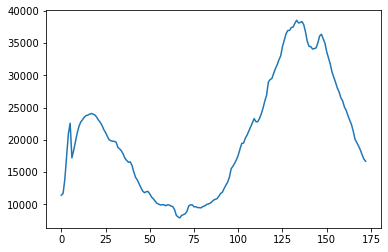

In [36]:
plt.plot(df)

In [37]:
df=df.dropna(how='all')

In [38]:
train_df,test_df =df[1:int(0.60 * len(df))],df[int(0.60 * len(df)):] 

In [39]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_6128/3151536076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_6128/3151536076.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s


In [40]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
    # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [132]:
n_past = 5
n_future =7
n_features = 1

In [133]:
X_train, y_train = split_series(train.values,n_past, n_future)

In [134]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [147]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = n_future)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [148]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        )
    return history
history_gru = fit_model(model_gru)


Epoch 1/100
5/5 [==============================] - 8s 334ms/step - loss: 0.5132 - val_loss: 0.2521
Epoch 2/100
5/5 [==============================] - 0s 27ms/step - loss: 0.3792 - val_loss: 0.1656
Epoch 3/100
5/5 [==============================] - 0s 23ms/step - loss: 0.2750 - val_loss: 0.0934
Epoch 4/100
5/5 [==============================] - 0s 21ms/step - loss: 0.1662 - val_loss: 0.0710
Epoch 5/100
5/5 [==============================] - 0s 29ms/step - loss: 0.1009 - val_loss: 0.1362
Epoch 6/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0857 - val_loss: 0.1761
Epoch 7/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0823 - val_loss: 0.1396
Epoch 8/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0759 - val_loss: 0.1052
Epoch 9/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0789 - val_loss: 0.0896
Epoch 10/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0764 - val_loss: 0.0916
Epoch 11/100
5/5 [

In [82]:
#model_gru.save('GRU_3days.h5')
model_gru=load_model("GRU_3days.h5")

In [124]:
#model_gru.save('GRU_5days.h5')
model_gru=load_model("GRU_5days.h5")

In [158]:
#model_gru.save('GRU_7days.h5')
model_gru=load_model("GRU_7days.h5")

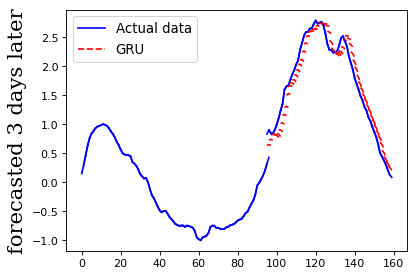

In [84]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred3GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred3GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 3 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [85]:
#MAE
from sklearn.metrics import mean_absolute_error
pred3GRU = pred3GRU.reshape((pred3GRU.shape[0], pred3GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred3GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred3GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

cases
Day  1 :
MAE-E2D2 :  0.11092136841026799
Day  2 :
MAE-E2D2 :  0.17053507881811955
Day  3 :
MAE-E2D2 :  0.23289376213770627


mean 0.17145006978869792


In [86]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



cases
Day  1 :
MAE-E2D2 :  0.12912232237528928
Day  2 :
MAE-E2D2 :  0.19595697239496487
Day  3 :
MAE-E2D2 :  0.2659005365846382


mean 0.19699327711829748


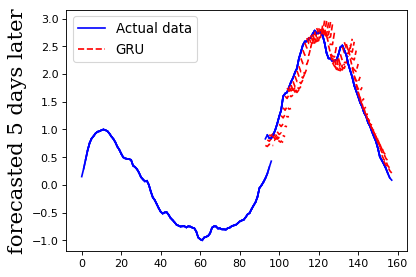

In [125]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred5GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred5GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 5 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [126]:
#MAE
from sklearn.metrics import mean_absolute_error
pred5GRU = pred5GRU.reshape((pred5GRU.shape[0], pred5GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred5GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred5GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

cases
Day  1 :
MAE-E2D2 :  0.09763718523963438
Day  2 :
MAE-E2D2 :  0.14850624676901586
Day  3 :
MAE-E2D2 :  0.19917532303465083
Day  4 :
MAE-E2D2 :  0.26992893976496246
Day  5 :
MAE-E2D2 :  0.3490246966761925


mean 0.21285447829689122


In [127]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



cases
Day  1 :
MAE-E2D2 :  0.11744480088094283
Day  2 :
MAE-E2D2 :  0.1831523128084588
Day  3 :
MAE-E2D2 :  0.24049820625273235
Day  4 :
MAE-E2D2 :  0.3204452712860726
Day  5 :
MAE-E2D2 :  0.4144871801424679


mean 0.2552055542741349


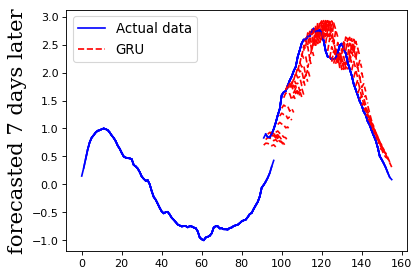

In [159]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred7GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred7GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 7 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [160]:
#MAE
from sklearn.metrics import mean_absolute_error
pred7GRU = pred7GRU.reshape((pred7GRU.shape[0], pred7GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred7GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred7GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

cases
Day  1 :
MAE-E2D2 :  0.1090067292503095
Day  2 :
MAE-E2D2 :  0.18069271532192194
Day  3 :
MAE-E2D2 :  0.22260145969650244
Day  4 :
MAE-E2D2 :  0.2958745348901272
Day  5 :
MAE-E2D2 :  0.3632046535370684
Day  6 :
MAE-E2D2 :  0.4255781334435118
Day  7 :
MAE-E2D2 :  0.47402307370862695


mean 0.2958544714068669


In [161]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



cases
Day  1 :
MAE-E2D2 :  0.1294681406701698
Day  2 :
MAE-E2D2 :  0.21967562319446718
Day  3 :
MAE-E2D2 :  0.2711785365854366
Day  4 :
MAE-E2D2 :  0.35664106336543877
Day  5 :
MAE-E2D2 :  0.4133195165032366
Day  6 :
MAE-E2D2 :  0.4947324354026825
Day  7 :
MAE-E2D2 :  0.5539134129576372


mean 0.3484183898112955


In [ ]:
###########Alpha deaths

In [167]:
df=pd.read_csv('next_Alpha_Iran.csv',usecols=['deaths'])

df.head()

deaths
0     123
1     161
2     172
3     174
4     193

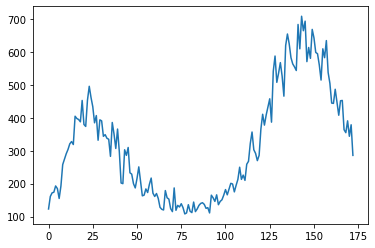

In [168]:
plt.plot(df)

In [169]:
df1=pd.read_csv('next_Alpha_Iran.csv',usecols=['deaths'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1

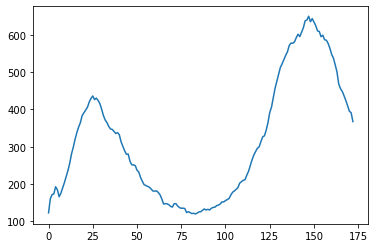

In [170]:
plt.plot(df)

In [171]:
train_df,test_df =df[1:int(0.60 * len(df))],df[int(0.60 * len(df)):] 

In [178]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_6128/3151536076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_6128/3151536076.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s


In [179]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
    # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [235]:
n_past = 5
n_future =7
n_features = 1

In [236]:
X_train, y_train = split_series(train.values,n_past, n_future)

In [237]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [255]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = n_future)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [256]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        )
    return history
history_gru = fit_model(model_gru)


Epoch 1/100
5/5 [==============================] - 9s 435ms/step - loss: 0.4029 - val_loss: 0.6892
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 0.3123 - val_loss: 0.4731
Epoch 3/100
5/5 [==============================] - 0s 28ms/step - loss: 0.2324 - val_loss: 0.2550
Epoch 4/100
5/5 [==============================] - 0s 29ms/step - loss: 0.1633 - val_loss: 0.0771
Epoch 5/100
5/5 [==============================] - 0s 26ms/step - loss: 0.1265 - val_loss: 0.0215
Epoch 6/100
5/5 [==============================] - 0s 26ms/step - loss: 0.1327 - val_loss: 0.0280
Epoch 7/100
5/5 [==============================] - 0s 28ms/step - loss: 0.1355 - val_loss: 0.0101
Epoch 8/100
5/5 [==============================] - 0s 31ms/step - loss: 0.1372 - val_loss: 0.0090
Epoch 9/100
5/5 [==============================] - 0s 30ms/step - loss: 0.1316 - val_loss: 0.0154
Epoch 10/100
5/5 [==============================] - 0s 26ms/step - loss: 0.1317 - val_loss: 0.0119
Epoch 11/100
5/5 [

Epoch 84/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0320 - val_loss: 0.0282
Epoch 85/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0419 - val_loss: 0.0043
Epoch 86/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0335 - val_loss: 0.0026
Epoch 87/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0307 - val_loss: 0.0146
Epoch 88/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0352 - val_loss: 0.0033
Epoch 89/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0355 - val_loss: 0.0119
Epoch 90/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0329 - val_loss: 0.0124
Epoch 91/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0426 - val_loss: 0.0025
Epoch 92/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0294 - val_loss: 0.0197
Epoch 93/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0325 - val_loss: 0.0125
Epoch 94/1

In [202]:
#model_gru.save('GRU_3daysdeaths.h5')
model_gru=load_model("GRU_3daysdeaths.h5")

In [226]:
#model_gru.save('GRU_5daysdeaths.h5')
model_gru=load_model("GRU_5daysdeaths.h5")

In [259]:
#model_gru.save('GRU_7daysdeaths.h5')
model_gru=load_model("GRU_7daysdeaths.h5")

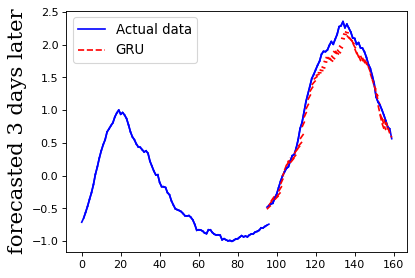

In [203]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred3GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred3GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 3 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [204]:
#MAE
from sklearn.metrics import mean_absolute_error
pred3GRU = pred3GRU.reshape((pred3GRU.shape[0], pred3GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred3GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred3GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

deaths
Day  1 :
MAE-E2D2 :  0.09501992819691149
Day  2 :
MAE-E2D2 :  0.13058002131545077
Day  3 :
MAE-E2D2 :  0.15364935912170385


mean 0.12641643621135537


In [205]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



deaths
Day  1 :
MAE-E2D2 :  0.1137281600766634
Day  2 :
MAE-E2D2 :  0.1550440968021284
Day  3 :
MAE-E2D2 :  0.18836872262826096


mean 0.15238032650235092


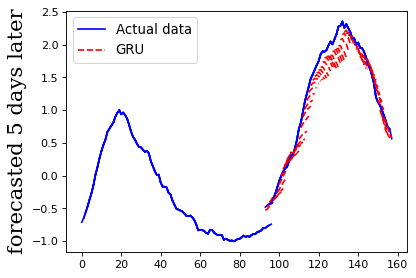

In [227]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred5GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred5GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 5 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [228]:
#MAE
from sklearn.metrics import mean_absolute_error
pred5GRU = pred5GRU.reshape((pred5GRU.shape[0], pred5GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred5GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred5GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

deaths
Day  1 :
MAE-E2D2 :  0.08926327588691738
Day  2 :
MAE-E2D2 :  0.11274171610785315
Day  3 :
MAE-E2D2 :  0.162530133181326
Day  4 :
MAE-E2D2 :  0.2032516799923668
Day  5 :
MAE-E2D2 :  0.2563783977456629


mean 0.16483304058282525


In [231]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



deaths
Day  1 :
MAE-E2D2 :  0.10879623138103213
Day  2 :
MAE-E2D2 :  0.1378054525655419
Day  3 :
MAE-E2D2 :  0.19865571439450988
Day  4 :
MAE-E2D2 :  0.2511801375456105
Day  5 :
MAE-E2D2 :  0.3150527857787284


mean 0.2022980643330846


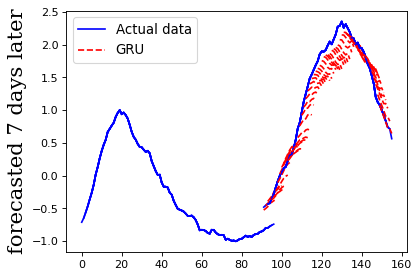

In [260]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred7GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred7GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 7 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [261]:
#MAE
from sklearn.metrics import mean_absolute_error
pred7GRU = pred7GRU.reshape((pred7GRU.shape[0], pred7GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred7GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred7GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

deaths
Day  1 :
MAE-E2D2 :  0.08116900102341561
Day  2 :
MAE-E2D2 :  0.11719286100010341
Day  3 :
MAE-E2D2 :  0.16030203521015868
Day  4 :
MAE-E2D2 :  0.21227152498168692
Day  5 :
MAE-E2D2 :  0.2512331543781821
Day  6 :
MAE-E2D2 :  0.289055633683734
Day  7 :
MAE-E2D2 :  0.350510102642008


mean 0.20881918755989837


In [263]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



deaths
Day  1 :
MAE-E2D2 :  0.10012981729127249
Day  2 :
MAE-E2D2 :  0.14149405584257777
Day  3 :
MAE-E2D2 :  0.193371799132323
Day  4 :
MAE-E2D2 :  0.25860657276809024
Day  5 :
MAE-E2D2 :  0.3068205075178707
Day  6 :
MAE-E2D2 :  0.3499045401026956
Day  7 :
MAE-E2D2 :  0.4206776049094437


mean 0.2530006996520391
